# Importing torch(PyTorch)

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision

# Device-agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Downloading and unzipping external data

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path/"pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} already exists... skippin downloading")
else:
    print(f"{image_path} doesn't exist, download it!")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path/"pizza_steak_sushi.zip", 'wb') as f:
        print("Downloading pizza, steak and sushi dataset...")

        request = requests.get("https://github.com/schizohub/pytorch-deep-learning/raw/c8a8f838279276238eb05523228eed4e74082e37/data/pizza_steak_sushi_20_percent.zip")
        f.write(request.content)

    with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", 'r') as zip_ref:
        print("Unzipping the data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi doesn't exist, download it!
Unzipping the data...


In [ ]:
data_path

PosixPath('data')

In [ ]:
import os 
def walk_through_thedata(path):
    for dirpath, dirname, filename in os.walk(path):
        print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}")


In [ ]:
walk_through_thedata(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 146 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 150 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 154 images in data/pizza_steak_sushi/train/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 58 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 46 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 46 images in data/pizza_steak_sushi/test/pizza


In [ ]:
train_dir = image_path/'train'
test_dir = image_path/'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# Seeing random data what it looks like...

Random image path: data/pizza_steak_sushi/train/sushi/2438557.jpg
Class of the image: sushi
Height of the image: 289
Width of image: 512


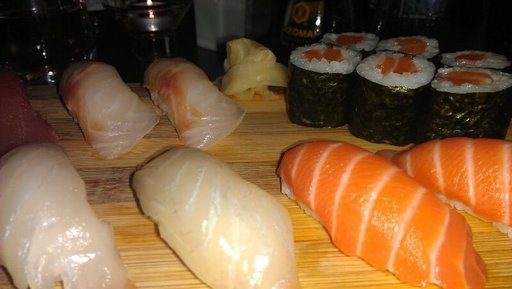

In [ ]:
import random 
from PIL import Image
# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

# len(image_path_list)

random_image_path = random.choice(image_path_list)
# print(random_image_path)

class_of_image = random_image_path.parent.stem

# print(class_of_image)
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Class of the image: {class_of_image}")
print(f"Height of the image: {img.height}")
print(f"Width of image: {img.width}")
img

In [ ]:
random_image_path

PosixPath('data/pizza_steak_sushi/train/sushi/2438557.jpg')

# Visualizing random image which is transformed arrar-like list or tensor(particularly numbers)

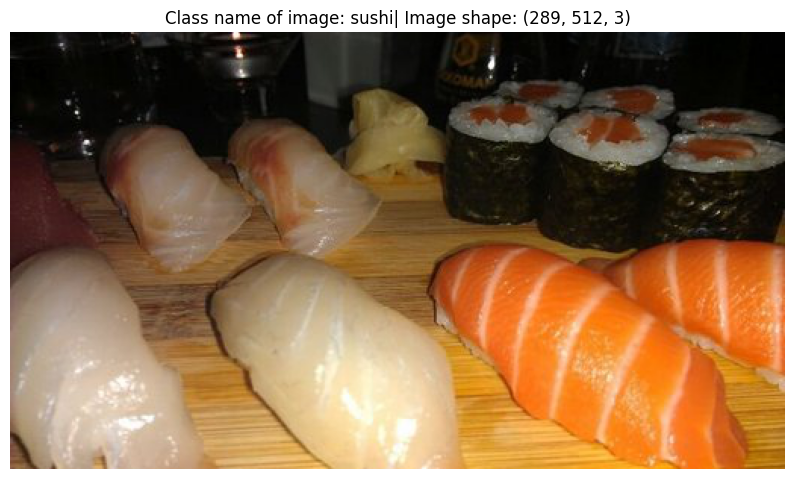

In [ ]:
import numpy as np

img_as_array = np.asarray(img)
# img_as_array

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Class name of image: {class_of_image}| Image shape: {img_as_array.shape}")
plt.axis(False);


# Building dataloader for image data

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# building a transformation function 
data_transform = transforms.Compose([
    # Resizing the image 
    transforms.Resize(size=(64,64)),
    # Flip the image randomly on horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Transforming image to a tensor 
    transforms.ToTensor()
])

In [ ]:
img_as_tensor = data_transform(img)
img_as_tensor.shape

torch.Size([3, 64, 64])

# Visualizing random images which are transformed `RandomHorizontalFlip` method

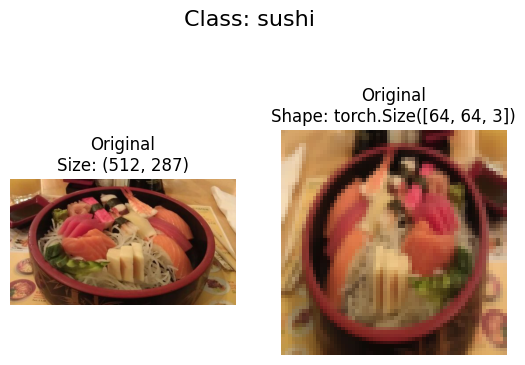

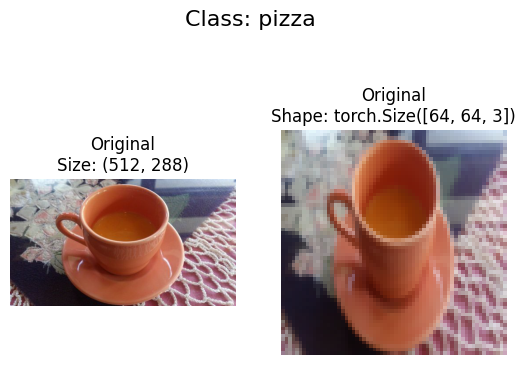

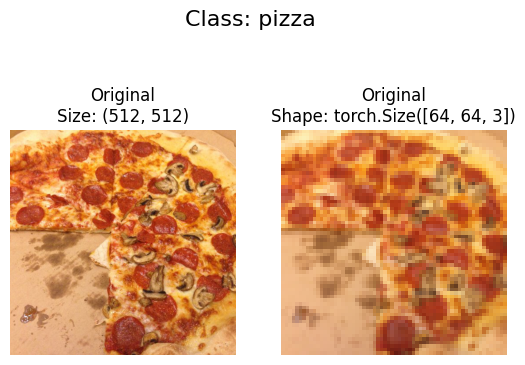

In [ ]:
def plot_transformed_images(img_paths:list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    
    random_image_paths = random.sample(img_paths, k=n)

    for img_path in random_image_paths:
        with Image.open(img_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            transform_image = transform(f).permute(1,2,0) # -> C,H,W -> H,W,C 
            ax[1].imshow(transform_image)
            ax[1].set_title(f"Original\nShape: {transform_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {img_path.parent.stem}", fontsize=16)


plot_transformed_images(img_paths=image_path_list,
                        transform=data_transform, 
                        n=3)

# Creating `ImageFolder`

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

In [ ]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f88110b7490>,
 <torch.utils.data.dataloader.DataLoader at 0x7f88110b7be0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(15, 5)

In [ ]:
len(train_data), len(test_data)

(450, 150)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


# Custom datasets

In [ ]:
import os
import pathlib
import torch
from PIL import Image 
from torch.utils.data import Dataset
from torchvision import transforms 
from typing import Tuple, Dict, List



In [ ]:
target_directory = train_dir
print(f"Target directory: {target_directory}")

class_names = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names

Target directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
for i, j in enumerate(class_names):
    print(i,"//", j)

0 // pizza
1 // steak
2 // sushi


In [ ]:
def find_classes(directory: str)-> Tuple[List[str], Dict[str, int]]:
    target_directory = directory
    # print(f"Target directory: {target_directory}")

    class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
    class_names_dict = {}
    for i, j in enumerate(class_names_found):
        class_names_dict[j] = i 
    return class_names_found, class_names_dict

find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# Coding our own `ImageFolder` class

In [ ]:
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir:str, transform=None):
        
        super().__init__()
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        # self.classes = sorted([entry.name for entry in list(os.scandir(targ_dir))])
        # self.classes_to_idx = {class_name: i for i, class_name in enumerate(self.classes)}
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index: int)-> Image.Image:
        image_path = self.paths[index] 

        return Image.open(image_path)

    def __len__(self)-> int:
        return len(self.paths)

    def __getitem__(self, index: int)->Tuple[torch.Tensor, int]:

        img = self.load_image(index)
        label = self.paths[index].parent.name
        class_to_idx = self.class_to_idx[label]

        if self.transform:
            return self.transform(img), class_to_idx 
        else:
            return img, class_to_idx

In [ ]:
list(pathlib.Path(train_dir).glob("*/*.jpg"))[0].parent.name

'steak'

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize([64, 64]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transfrom = transforms.Compose([
    transforms.Resize([64,64]), 
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transform)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transfrom)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f88110b76d0>,
 <__main__.ImageFolderCustom at 0x7f881bd1c760>)

In [ ]:
len(train_data), len(train_data_custom)

(450, 450)

In [ ]:
len(test_data), len(test_data_custom)

(150, 150)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int=10,
                          display_shape: bool=True,
                          seed: int = None):
    
    if n>10:
        n=10
        display_shape=False
        print("For display, purposes, n is too high, it shouldn't be longer than 10")

    if seed:
        random.seed(seed)
    
    random_sample_idx = random.sample(range(len(dataset)), k=n)
    
    plt.figure(figsize=(16,8))

    for i, targ_sample in enumerate(random_sample_idx):
        targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        
        targ_img_adjust = targ_img.permute(1,2,0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_img_adjust)
        plt.axis("off")

        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title=title + f"\nshape: {targ_img_adjust.shape}"
            plt.title(title)


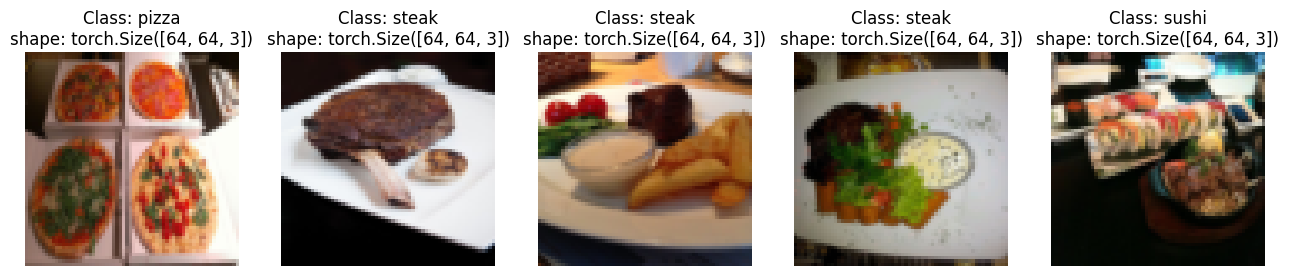

In [ ]:
display_random_images(dataset = train_data, 
                      n=5,
                      classes=train_data.classes,
                      seed = None)

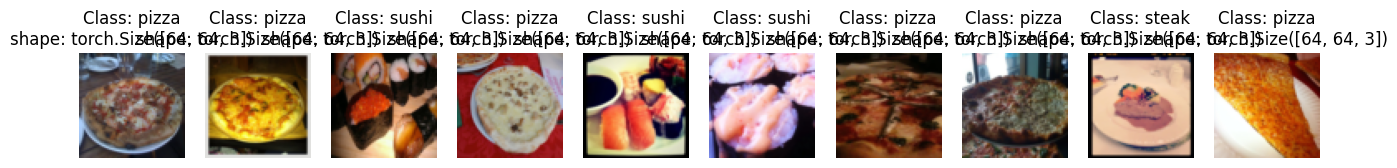

In [ ]:
display_random_images(dataset = train_data_custom, 
                      n=10,
                      classes=train_data.classes,
                      seed = None)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom, 
                                    batch_size=BATCH_SIZE,
                                    num_workers = NUM_WORKERS,
                                    shuffle=False)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

# Data Augmentation (Trivial Augmentation)

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_trasnform = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor()
])

In [ ]:
train_transform_v2 = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.AugMix(),
    transforms.ToTensor()
])

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
len(image_path_list)

600

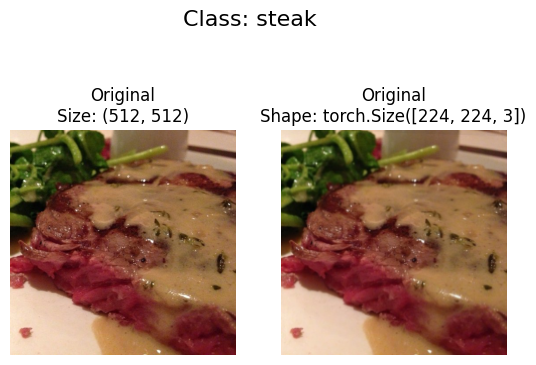

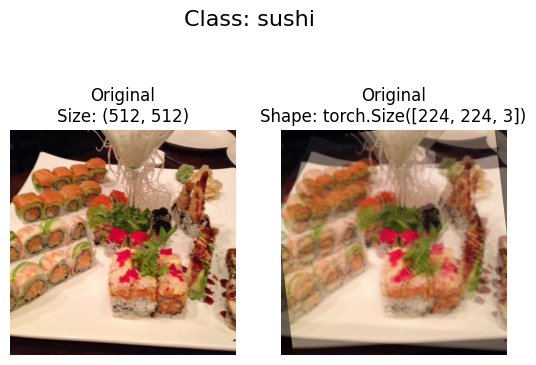

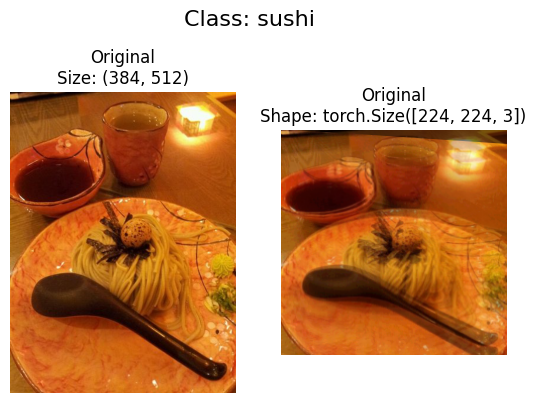

In [ ]:
plot_transformed_images(
    img_paths=image_path_list,
    transform=train_transform_v2,
    n=3,
    seed=None
)

# Tiny VGG model without data augmentation

## Creating transforms and loading the data for model 0

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize([64,64]),
    transforms.ToTensor()
])

In [ ]:
train_data_v1 = datasets.ImageFolder(root=train_dir,
                                     transform=simple_transform,
                                     target_transform=None)
test_data_v1 = datasets.ImageFolder(root=test_dir,
                                    transform=simple_transform,
                                    target_transform=None)



In [ ]:
BATCH_SIZE=32

train_dataloader_v1 = DataLoader(dataset=train_data_v1,
                                 batch_size=BATCH_SIZE,
                                 shuffle=True,
                                 num_workers=os.cpu_count())

test_dataloader_v1 = DataLoader(dataset=test_data_v1,
                                batch_size=BATCH_SIZE,
                                shuffle=False,
                                num_workers=os.cpu_count())

## Creating `TinyVGG` model for image data

In [ ]:
class TinyVGGModelV1(nn.Module):
    def __init__(self,
                 input_features:int,
                 hidden_units: int, 
                 output_features:int)->None:
        super().__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.Tanh(),
            # nn.Dropout2d(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.Tanh(),
            # nn.Dropout2d(),
            # nn.Conv2d(in_channels=hidden_units,
            #           out_channels=hidden_units,
            #           kernel_size=2,
            #           stride=1,
            #           padding=0),
            # nn.Tanh(),
            # # nn.Dropout2d(),
            # nn.BatchNorm2d(hidden_units),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2,
                         padding=0)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.Tanh(),
            # nn.Dropout2d(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.Tanh(),
            # nn.Dropout2d(),
            # nn.Conv2d(in_channels=hidden_units,
            #           out_channels=hidden_units,
            #           kernel_size=2,
            #           stride=1,
            #           padding=0),
            # nn.Tanh(),
            # nn.BatchNorm2d(hidden_units),
            # # nn.Dropout2d(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2,
                         padding=0)
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.Tanh(),
            # nn.Dropout2d(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.BatchNorm2d(hidden_units),
            nn.Tanh(),
            # nn.Dropout2d(),
            # nn.Conv2d(in_channels=hidden_units,
            #           out_channels=hidden_units,
            #           kernel_size=2,
            #           stride=1,
            #           padding=0),
            # nn.Tanh(),
            # nn.BatchNorm2d(hidden_units),
            # nn.Dropout2d(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2,
                         padding=0)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*6*6,
                      out_features=output_features)
        )
    
    def forward(self, x):
        # return self.classifier(self.conv_block2(self.conv_block1(x)))
        x = self.conv_block1(x)
        # print(x.shape)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [ ]:
torch.manual_seed(42)
model_v0 = TinyVGGModelV1(input_features=3,
                          hidden_units=128,
                          output_features=3).to(device)
model_v0

TinyVGGModelV1(
  (conv_block1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(128, 128, kernel_size=(2, 2), stride=(1

In [ ]:
device

'cuda'

### Try `forward_propagation` on a single image in case the model has shape problem

In [ ]:
img_batch, label_batch = next(iter(train_dataloader_v1))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
results = model_v0(img_batch.to(device))

In [ ]:
# (results.argmax(dim=1)==label_batch.to(device)).sum()/len(label_batch)
results.argmax(dim=1), label_batch

(tensor([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'),
 tensor([0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0,
         0, 2, 1, 1, 0, 0, 2, 1]))

In [ ]:
torch.sum(label_batch.to(device)==results.argmax(dim=1))

tensor(12, device='cuda:0')

### Using `torchinfo` to see infos of the model

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchinfo import summary

summary(model= model_v0, input_size=(img_batch.shape))

/usr/local/lib/python3.10/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.10/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModelV1                           [32, 3]                   --
├─Sequential: 1-1                        [32, 128, 31, 31]         --
│    └─Conv2d: 2-1                       [32, 128, 63, 63]         1,664
│    └─BatchNorm2d: 2-2                  [32, 128, 63, 63]         256
│    └─Tanh: 2-3                         [32, 128, 63, 63]         --
│    └─Conv2d: 2-4                       [32, 128, 62, 62]         65,664
│    └─BatchNorm2d: 2-5                  [32, 128, 62, 62]         256
│    └─Tanh: 2-6                         [32, 128, 62, 62]         --
│    └─MaxPool2d: 2-7                    [32, 128, 31, 31]         --
├─Sequential: 1-2                        [32, 128, 14, 14]         --
│    └─Conv2d: 2-8                       [32, 128, 30, 30]         65,664
│    └─BatchNorm2d: 2-9                  [32, 128, 30, 30]         256
│    └─Tanh: 2-10                        [32, 128, 30, 30]         --
│

In [ ]:
# model_v0.state_dict()

## Tuning data through the model(`Looping through each train and test steps`)

In [ ]:
#Creating train_step function
def train_step(model: nn.Module,
               optimizer: torch.optim.Optimizer,
               loss_fn: nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               device=device):
    train_loss, train_acc = 0,0

    #Put the model train mode
    model.train()

    #Gettin' learning rate 
    lr = [param['lr'] for param in optimizer.param_groups]
  
    #Loopin' through
    for batch, (X,y) in enumerate(train_dataloader):
    
        #Put the data to the target device
        X, y = X.to(device), y.to(device)
    
        #Forward-prop
        y_probs = model(X)
    
        #Calculate the loss and acc
        loss = loss_fn(y_probs, y)
        train_loss+=loss.item()
        y_pred_class = torch.argmax(torch.softmax(y_probs, dim=1),dim=1)
        train_acc+= (y_pred_class==y).sum().item()/len(y_probs)
                
        #Optimizer zero grad
        optimizer.zero_grad()
    
        #Backpropagation
        loss.backward()
    
        #Optimizer step
        optimizer.step()

    #Calculate the accumulated loss and acc by dividing length of data
    train_loss/=len(train_dataloader)
    train_acc/=len(train_dataloader)

    #Printing the summary
    print(f"Train_loss: {train_loss:.4f}, Train_accuracy: {train_acc:.2f}%")

    #returning calculated loss and acc
    return train_loss, train_acc

#Creating test_step function
def test_step(model: nn.Module, 
              loss_fn: nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              device=device):
    #Put the model to the eval mode
    model.eval()

    test_loss, test_acc = 0,0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):

            #Put the data to the target device
            X, y = X.to(device), y.to(device)

            #Forward-prop
            y_probs = model(X)

            #Calculate the loss and acc
            loss = loss_fn(y_probs, y)
            test_loss+=loss.item()
            y_pred_class = torch.argmax(torch.softmax(y_probs, dim=1), dim=1)
            test_acc+= (y_pred_class==y).sum().item()/len(y_probs)

        #Calculating original loss and acc by dividing the length of data per batch
        test_loss/=len(test_dataloader)
        test_acc /=len(test_dataloader)

        #Printing the summary
        print(f"Test_loss: {test_loss:.4f}, Test_accuracy: {test_acc:.2f}%")

        #Returning neccesary things
        return test_loss, test_acc

In [ ]:
def timer_fn(
    start: float,
    end: float,
    device=device):
    total_time = end-start
    print(f"Total time of the process is {total_time:.3f} on the {device}")
    return total_time

In [ ]:
torch.manual_seed(42)
import numpy as np 
def Fine_tune(model:nn.Module,
              train_dataloader: torch.utils.data,
              test_dataloader:torch.utils.data,
              optimizer,
              loss_fn:nn.Module,
              epochs=5):
    from timeit import default_timer as timer
    from tqdm.auto import tqdm
    start_time_on_gpu = timer()
    train_losses, test_losses = [], []
    train_accs, test_accs = [], []
    results = []
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n-----------------")

        train_loss, train_acc = train_step(model=model,
                   optimizer=optimizer,
                   loss_fn=loss_fn,
                   train_dataloader=train_dataloader)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        test_loss, test_acc = test_step(model=model,
                                        loss_fn=loss_fn,
                                        test_dataloader=test_dataloader)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        results.append([train_loss, train_acc, test_loss, test_acc])
    end_time_on_gpu = timer()
    total_train_time_on_model_1 = timer_fn(start_time_on_gpu, end_time_on_gpu)

    fig = plt.figure(figsize=(15,7))
    rows, cols = 1,2
    # for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols,1)
    plt.plot(np.arange(1,epochs+1), np.array(train_losses), label='train_loss')
    plt.plot(np.arange(1,epochs+1),np.array(test_losses), label='test_loss')
    plt.title("Train_loss and Test_loss by epoch")
    plt.xlabel("Epochs")
    plt.legend()
    fig.add_subplot(rows, cols,2)
    plt.plot(np.arange(1,epochs+1),np.array(train_accs), label='train_acc')
    plt.plot(np.arange(1,epochs+1), np.array(test_accs), label='test_acc')
    plt.title("Train_acc and Test_acc by epoch")
    plt.xlabel("Epochs")
    plt.legend();
    return results

In [ ]:
# optimizer = torch.optim.SGD(params=model_v0.parameters(), lr=0.01,momentum=0.9)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v0.parameters(), lr=0.001, weight_decay=0.005)
# optimizer = torch.optim.Adagrad(params=model_v0.parameters(), lr=0.01, weight_decay=0.0035)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----------------
Train_loss: 1.0451, Train_accuracy: 0.54%
Test_loss: 1.0008, Test_accuracy: 0.64%
Epoch: 1
-----------------
Train_loss: 0.9372, Train_accuracy: 0.62%
Test_loss: 1.1211, Test_accuracy: 0.50%
Epoch: 2
-----------------
Train_loss: 1.0275, Train_accuracy: 0.57%
Test_loss: 1.1894, Test_accuracy: 0.53%
Epoch: 3
-----------------
Train_loss: 0.9095, Train_accuracy: 0.60%
Test_loss: 1.1400, Test_accuracy: 0.54%
Epoch: 4
-----------------
Train_loss: 0.8715, Train_accuracy: 0.62%
Test_loss: 1.1867, Test_accuracy: 0.45%
Epoch: 5
-----------------
Train_loss: 0.8811, Train_accuracy: 0.65%
Test_loss: 1.1468, Test_accuracy: 0.53%
Epoch: 6
-----------------
Train_loss: 0.8523, Train_accuracy: 0.61%
Test_loss: 1.1617, Test_accuracy: 0.54%
Epoch: 7
-----------------
Train_loss: 0.8149, Train_accuracy: 0.65%
Test_loss: 1.2755, Test_accuracy: 0.47%
Epoch: 8
-----------------
Train_loss: 0.8406, Train_accuracy: 0.65%
Test_loss: 1.1399, Test_accuracy: 0.52%
Epoch: 9
----------

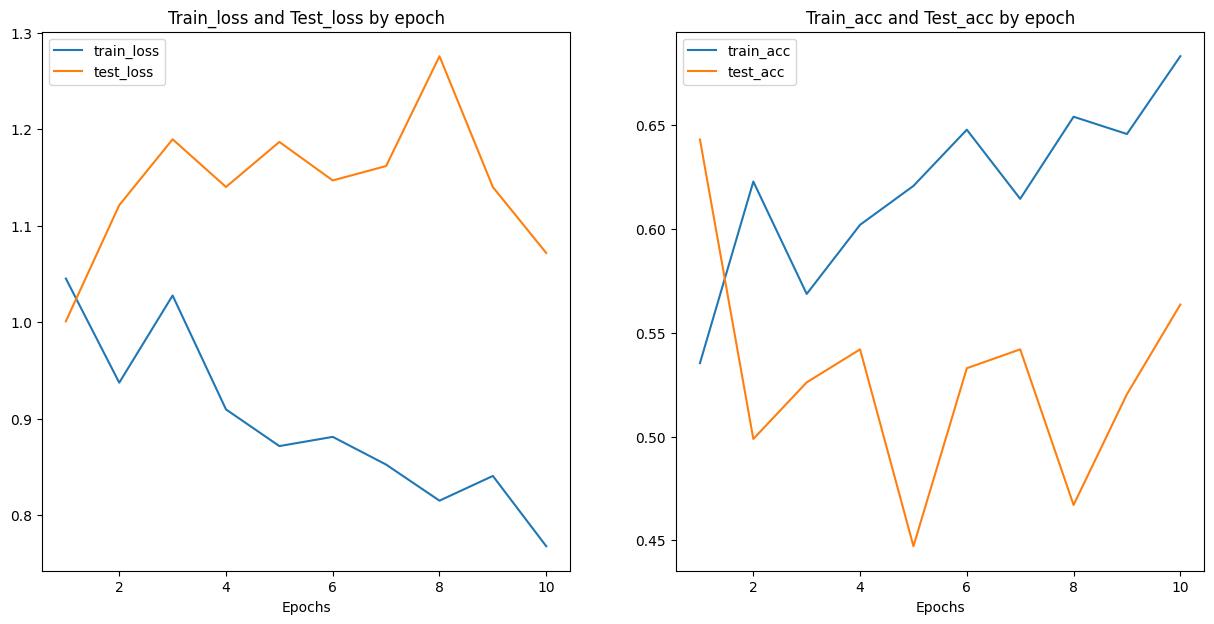

In [ ]:
model_v0_results = Fine_tune(model=model_v0,
          train_dataloader=train_dataloader,
          test_dataloader=test_dataloader,
          optimizer=optimizer,
          loss_fn=loss_fn,
          epochs=10)

#TinyVGG model with data augmentation

## Creating augmentation transformer

In [ ]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

## Creating `ImageFolder` with augmentation transformer

In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_trivial)

## Creating `DataLoader` with augmented `ImageFolder`

In [ ]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS=os.cpu_count()
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

## Creating model_1 with TinyVGG

In [ ]:
model_v1 = TinyVGGModelV1(input_features=3,
                          hidden_units=128,
                          output_features=3).to(device)
model_v1

TinyVGGModelV1(
  (conv_block1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(128, 128, kernel_size=(2, 2), stride=(1

In [ ]:
img_batch, label_batch = next(iter(train_dataloader_augmented))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
results = model_v1(img_batch.to(device))

In [ ]:
results.argmax(dim=1), label_batch

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 2, 0], device='cuda:0'),
 tensor([0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0,
         0, 2, 1, 1, 0, 0, 2, 1]))

In [ ]:
sum(results.argmax(dim=1)==label_batch.to(device))

tensor(8, device='cuda:0')

In [ ]:
optimizer = torch.optim.SGD(params=model_v1.parameters(), lr=0.003)
loss_fn = nn.CrossEntropyLoss()

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----------------
Train_loss: 1.0683, Train_accuracy: 0.42%
Test_loss: 1.0614, Test_accuracy: 0.40%
Epoch: 1
-----------------
Train_loss: 0.9569, Train_accuracy: 0.54%
Test_loss: 1.0603, Test_accuracy: 0.48%
Epoch: 2
-----------------
Train_loss: 0.9513, Train_accuracy: 0.53%
Test_loss: 1.1861, Test_accuracy: 0.46%
Epoch: 3
-----------------
Train_loss: 0.9435, Train_accuracy: 0.55%
Test_loss: 1.4851, Test_accuracy: 0.42%
Epoch: 4
-----------------
Train_loss: 0.9636, Train_accuracy: 0.54%
Test_loss: 1.0660, Test_accuracy: 0.47%
Epoch: 5
-----------------
Train_loss: 0.8603, Train_accuracy: 0.61%
Test_loss: 0.9738, Test_accuracy: 0.56%
Epoch: 6
-----------------
Train_loss: 0.8550, Train_accuracy: 0.63%
Test_loss: 0.8394, Test_accuracy: 0.59%
Epoch: 7
-----------------
Train_loss: 0.8120, Train_accuracy: 0.65%
Test_loss: 1.2868, Test_accuracy: 0.53%
Epoch: 8
-----------------
Train_loss: 0.8420, Train_accuracy: 0.63%
Test_loss: 1.0548, Test_accuracy: 0.55%
Epoch: 9
----------

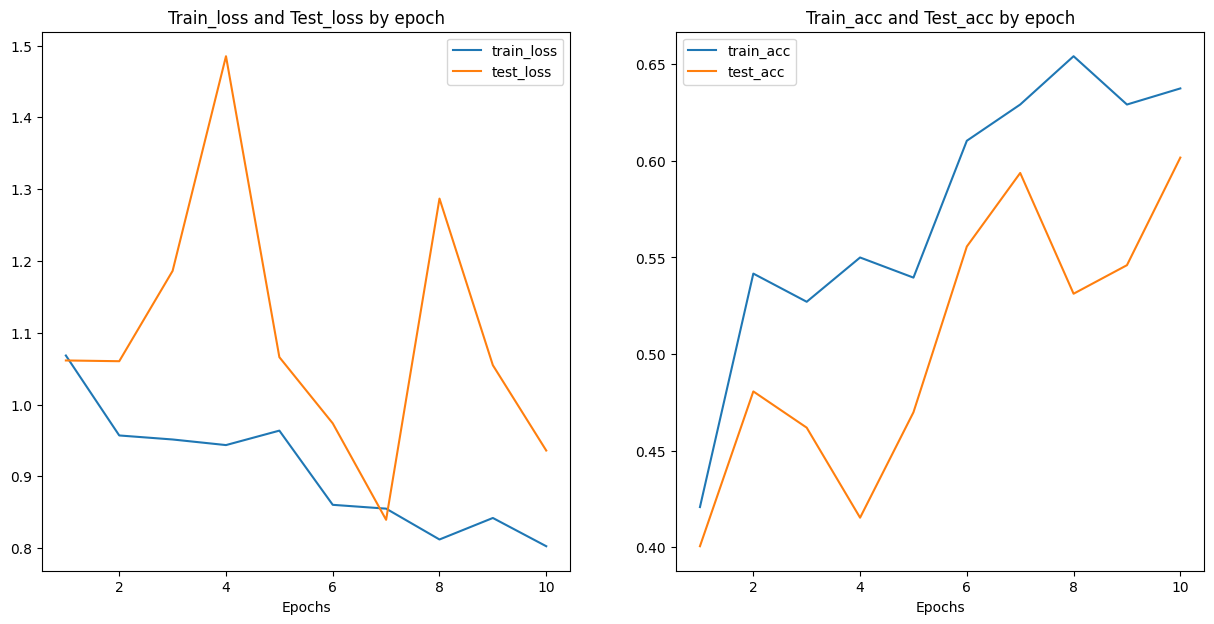

In [ ]:
model_v1_results = Fine_tune(model=model_v1,
          train_dataloader=train_dataloader_augmented,
          test_dataloader=test_dataloader_simple,
          optimizer=optimizer,
          loss_fn=loss_fn,
          epochs=10)

In [ ]:
from pandas.core.arrays.base import mode
import pandas as pd
model_v0_res = pd.DataFrame(model_v0_results, columns=["train_loss","train_acc","test_loss","test_acc"])
model_v1_res = pd.DataFrame(model_v1_results, columns=["train_loss","train_acc","test_loss","test_acc"])
model_v0_res

,train_loss,train_acc,test_loss,test_acc
0,1.045111,0.535417,1.000832,0.643182
1,0.937218,0.622917,1.121144,0.498864
2,1.027536,0.568750,1.189439,0.526136
3,0.909512,0.602083,1.140031,0.542045
4,0.871507,0.620833,1.186707,0.447159
5,0.881061,0.647917,1.146778,0.532955
6,0.852327,0.614583,1.161728,0.542045
7,0.814934,0.654167,1.275513,0.467045
8,0.840561,0.645833,1.139915,0.520455
9,0.767727,0.683333,1.071607,0.563636


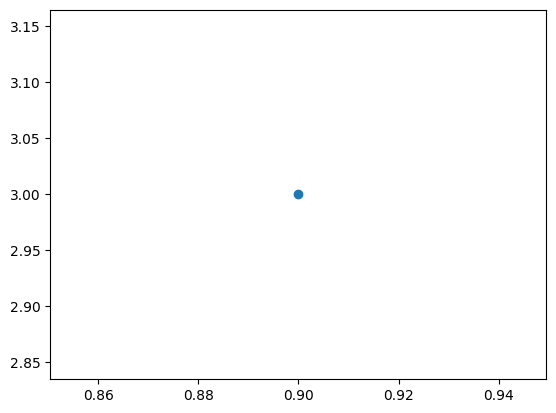

In [ ]:
plt.scatter(0.9, 3)

In [ ]:
min(model_v0_res['train_loss']), model_v0_res[model_v0_res['train_loss']==min(model_v0_res['train_loss'])].index[0]

(0.767726985613505, 9)

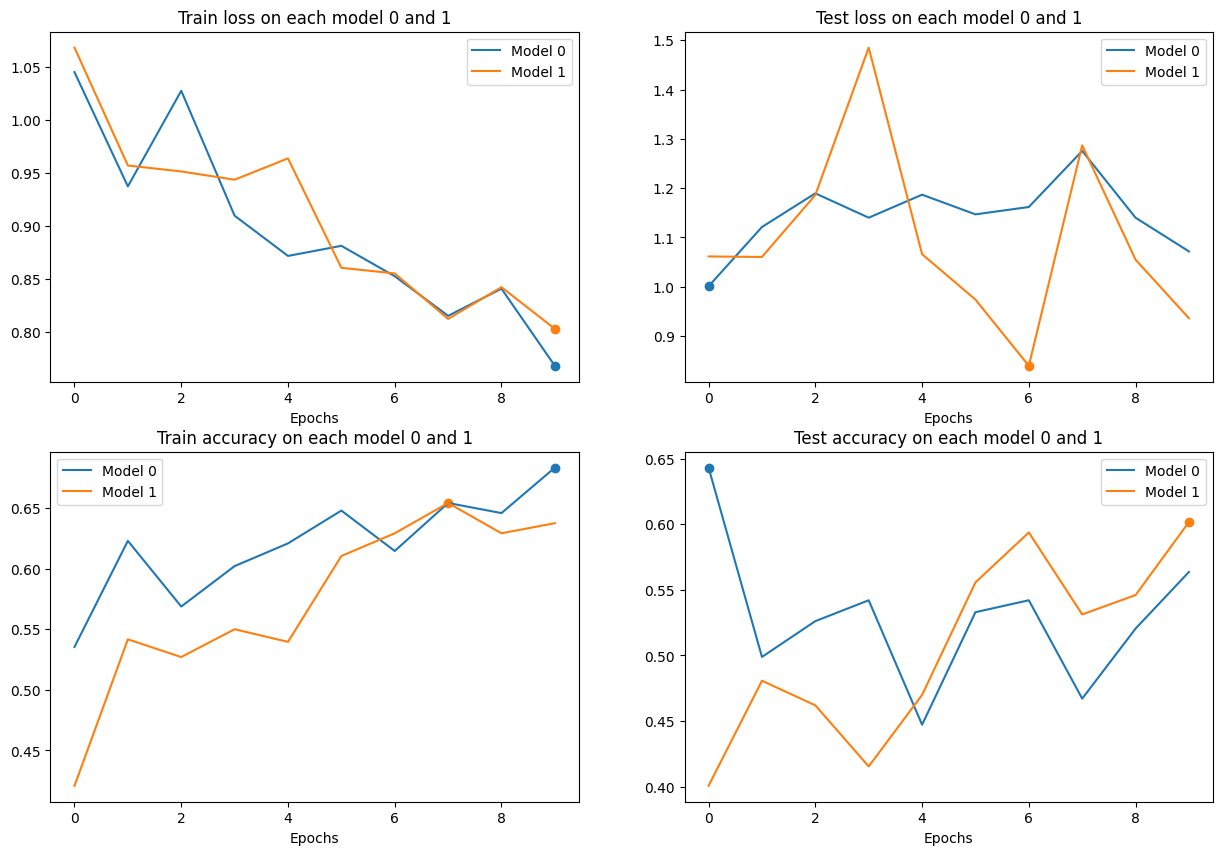

In [ ]:
#setup a plot
plt.figure(figsize=(15,10))

#Get the number of epochs
epochs = range(len(model_v0_res))

#Plot the train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_v0_res['train_loss'], label='Model 0')
plt.plot(epochs, model_v1_res['train_loss'], label='Model 1')
plt.scatter(model_v0_res[model_v0_res['train_loss']==min(model_v0_res['train_loss'])].index[0],min(model_v0_res['train_loss']))
plt.scatter(model_v1_res[model_v1_res['train_loss']==min(model_v1_res['train_loss'])].index[0],min(model_v1_res['train_loss']))
plt.title("Train loss on each model 0 and 1")
plt.xlabel("Epochs")
plt.legend()

#Plot the test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_v0_res['test_loss'], label='Model 0')
plt.plot(epochs, model_v1_res['test_loss'], label='Model 1')
plt.scatter(model_v0_res[model_v0_res['test_loss']==min(model_v0_res['test_loss'])].index[0],min(model_v0_res['test_loss']))
plt.scatter( model_v1_res[model_v1_res['test_loss']==min(model_v1_res['test_loss'])].index[0],min(model_v1_res['test_loss']))
plt.title("Test loss on each model 0 and 1")
plt.xlabel("Epochs")
plt.legend()

#Plot the train accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model_v0_res['train_acc'], label='Model 0')
plt.plot(epochs, model_v1_res['train_acc'], label='Model 1')
plt.scatter(model_v0_res[model_v0_res['train_acc']==max(model_v0_res['train_acc'])].index[0],max(model_v0_res['train_acc']))
plt.scatter(model_v1_res[model_v1_res['train_acc']==max(model_v1_res['train_acc'])].index[0],max(model_v1_res['train_acc']))
plt.title("Train accuracy on each model 0 and 1")
plt.xlabel("Epochs")
plt.legend()

#Plot the test accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_v0_res['test_acc'], label='Model 0')
plt.plot(epochs, model_v1_res['test_acc'], label='Model 1')
plt.scatter(model_v0_res[model_v0_res['test_acc']==max(model_v0_res['test_acc'])].index[0],max(model_v0_res['test_acc']))
plt.scatter(model_v1_res[model_v1_res['test_acc']==max(model_v1_res['test_acc'])].index[0],max(model_v1_res['test_acc']))
plt.title("Test accuracy on each model 0 and 1")
plt.xlabel("Epochs")
plt.legend();

# Making a prediction on a custom image

In [ ]:
"https://th.bing.com/th/id/OIP.84jEqC_elJ414FjqHOJp5gHaFj?pid=ImgDet&rs=1"

'https://th.bing.com/th/id/OIP.84jEqC_elJ414FjqHOJp5gHaFj?pid=ImgDet&rs=1'

In [ ]:
import requests
custom_img = data_path/"steak.jpg"

if not custom_img.is_file():
    with open(custom_img,'wb') as f:
        request = requests.get("https://th.bing.com/th/id/R.11e54d6b8ecb0281bd6181599d5a2993?rik=ddmRUNOns5t2Pg&pid=ImgRaw&r=0")
        print(f"Downloading {custom_img}...")
        f.write(request.content)
else:
    print(f"{custom_img} already exists, skipping downloading...")

In [ ]:
import torchvision.io

custom_img_uint = torchvision.io.read_image("/content/data/steak.jpg")
custom_img_uint.shape

torch.Size([3, 4887, 8688])

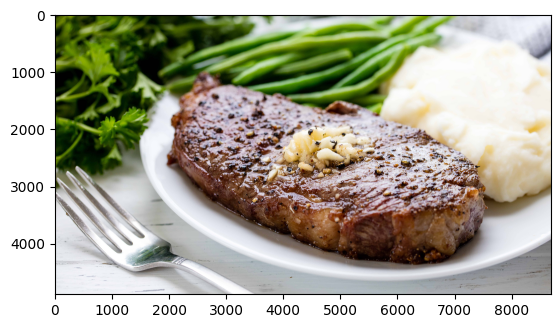

In [ ]:
plt.imshow(custom_img_uint.permute(1,2,0))

In [ ]:
# data_transform(custom_img_uint.numpy())

In [ ]:
custom_img_uint=custom_img_uint.type(torch.float32)/255.

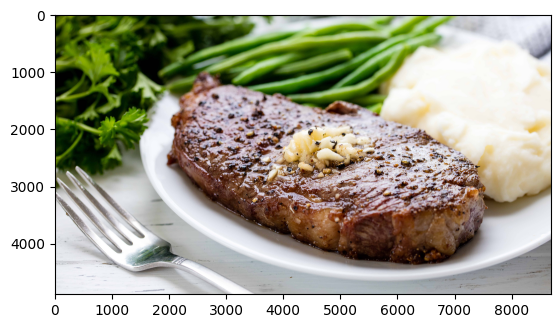

In [ ]:
plt.imshow(custom_img_uint.permute(1,2,0))

In [ ]:
shapes = transforms.Compose([transforms.Resize(size=(64,64))])

In [ ]:
transformed_img = shapes(custom_img_uint)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


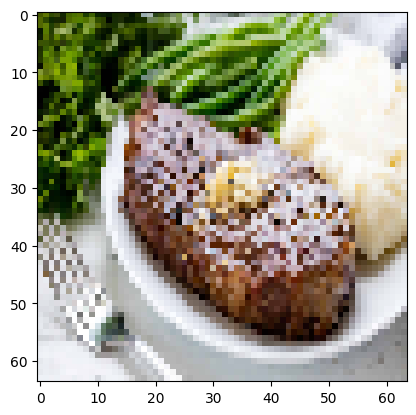

In [ ]:
plt.imshow(transformed_img.permute(1,2,0))

In [ ]:
transformed_img.shape

torch.Size([3, 64, 64])

In [ ]:
model_v1.eval()
with torch.inference_mode():
    img_pred = model_v1(transformed_img.unsqueeze(0).to(device))


In [ ]:
img_pred.argmax(dim=1)

tensor([1], device='cuda:0')

In [ ]:
img_pred

tensor([[-0.5117, -0.1544, -0.6203]], device='cuda:0')

In [ ]:
img_pred[0][1]/3*100

tensor(-5.1461, device='cuda:0')

In [ ]:
def predict_and_plot_img(model:nn.Module,
                         image_path:str,
                         class_names:List[str]=None,
                         transform=None,
                         device=device):
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    target_image/=255
    if transform:
        target_image=transform(target_image)
    
    model.to(device)
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)
        pred = model(target_image.to(device))

    logits = torch.softmax(pred,dim=1)
    pred_label = torch.argmax(logits,dim=1)
    
    plt.imshow(target_image.squeeze().permute(1,2,0))

    if class_names:
        title = f"Pred: {class_names[pred_label]}| probability: {logits.max():.3f}"
    else:
        title = f"Pred: {pred_label}| probability: {logits.max():.3f}"
    plt.title(title)
    plt.axis('off')

In [ ]:
# custom_img_uint
class_names

['pizza', 'steak', 'sushi']

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


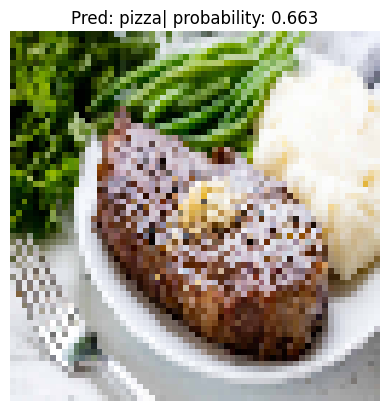

In [ ]:
predict_and_plot_img(model=model_v0,
                     image_path=str(custom_img),
                     class_names=class_names,
                     transform=shapes)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


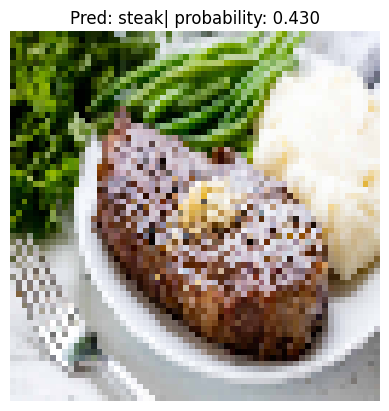

In [ ]:
predict_and_plot_img(model=model_v1,
                     image_path=str(custom_img),
                     class_names=class_names,
                     transform=shapes)